In [78]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
x = []
y = []
z = []
v_x = []
v_y = []
v_z = []
t = []
with open('traj.txt', 'r') as f:
    f.readline()
    some_useful_shit = f.readline()
    f.readline()
    for line in f.readlines():
        x.append(line.split()[0])
        y.append(line.split()[1])
        z.append(line.split()[2])
        v_x.append(line.split()[3])
        v_y.append(line.split()[4])
        v_z.append(line.split()[5])
        t.append(line.split()[6])

In [3]:
df = pd.DataFrame({'x': x, 
                   'y' : y, 
                   'z' : z, 
                   'v_x' : v_x, 
                   'v_y' : v_y, 
                   'v_z' : v_z, 
                   't' : t})

In [4]:
df['x'] = df['x'].apply(float)
df['y'] = df['y'].apply(float)
df['z'] = df['z'].apply(float)
df['v_x'] = df['v_x'].apply(float)
df['v_y'] = df['v_y'].apply(float)
df['v_z'] = df['v_z'].apply(float)
df['t'] = df['t'].apply(float)


/srv/jupyterhub/py2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  """


Text(0,0.5,'z')

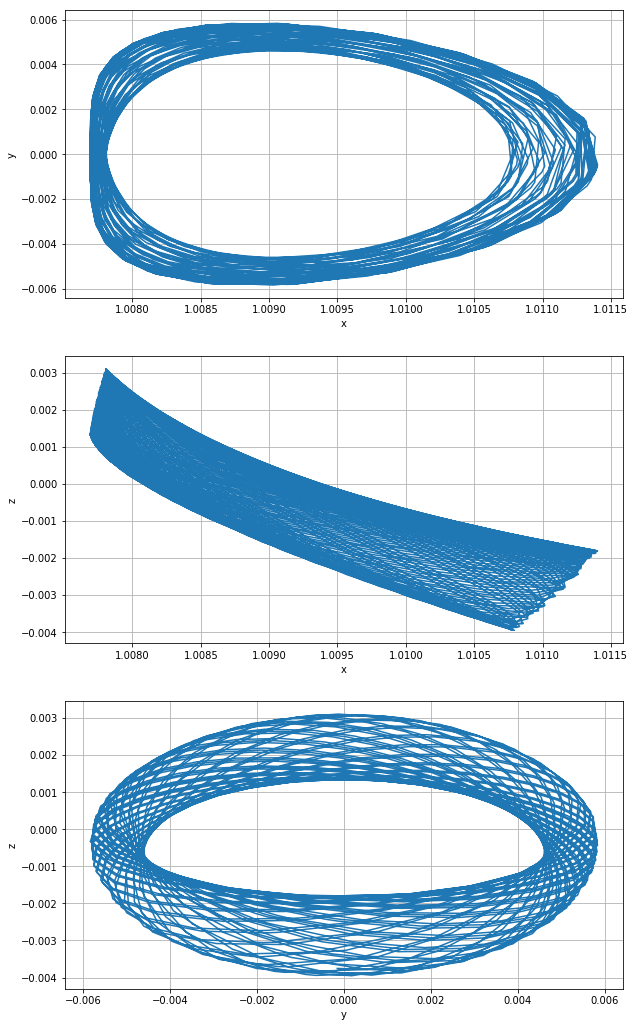

In [75]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,18))
ax[0].grid()
ax[1].grid()
ax[2].grid()
fig = ax[0].plot('x', 'y', data=df)
fig = ax[1].plot('x', 'z', data=df)
fig = ax[2].plot('y', 'z', data=df)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].set_xlabel('x')
ax[1].set_ylabel('z')
ax[2].set_xlabel('y')
ax[2].set_ylabel('z')

In [14]:
list_of_some_useful_shit = (some_useful_shit.replace('[', '')
                            .replace(']', '')
                            .replace('#', '')
                            .replace('\n', '')
                            .replace(',', '')
                            .split())

In [21]:
dct_for_useful_shit = {}
for elem in list_of_some_useful_shit[:3]:
    dct_for_useful_shit.update({elem.split('=')[0]: float(elem.split('=')[1])})

In [26]:
center_coords = [dct_for_useful_shit['L2'], 0., 0.]

In [27]:
df['coords_to_center_x'] = df.x - center_coords[0]
df['coords_to_center_y'] = df.y - center_coords[1]
df['coords_to_center_z'] = df.z - center_coords[2]

In [41]:
x_min = df[df.coords_to_center_x == df.coords_to_center_x.min()].x.values[0]
x_max = df[df.coords_to_center_x == df.coords_to_center_x.max()].x.values[0]
y_min = df[df.coords_to_center_y == df.coords_to_center_y.min()].y.values[0]
y_max = df[df.coords_to_center_y == df.coords_to_center_y.max()].y.values[0]
z_min = df[df.coords_to_center_z == df.coords_to_center_z.min()].z.values[0]
z_max = df[df.coords_to_center_z == df.coords_to_center_z.max()].z.values[0]

In [44]:
print('x size %f km'%((x_max - x_min)*dct_for_useful_shit['R']))
print('y size %f km'%((y_max - y_min)*dct_for_useful_shit['R']))
print('z size %f km'%((z_max - z_min)*dct_for_useful_shit['R']))

x size 555113.129427 km
y size 1745044.372573 km
z size 1055905.918642 km


ax0+by0+cz0+d/sqrt(a^2+b^2+c^2) ax+by+cz+d=0 
y=0 
=> Точки наиболее близкие к плоскости у=0 это точки с мин игреком? 


In [60]:
df['abs_y'] = df.coords_to_center_y.apply(abs)
view = df.sort_values(by=['abs_y']).reset_index()

In [66]:
ninety_nine_points = view.loc[:99,['x', 'z'] ]

In [96]:
apx = ninety_nine_points[ninety_nine_points.x>0].x.min()

In [98]:
apz = ninety_nine_points[ninety_nine_points.z>0].z.min() - ninety_nine_points[ninety_nine_points.z<0].z.max()

In [100]:
print('apx = %f km, apz = %f km'%(apx*dct_for_useful_shit['R'], apz*dct_for_useful_shit['R']))

apx = 150750746.727143 km, apz = 469831.680111 km


/srv/jupyterhub/py2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  after removing the cwd from sys.path.


Text(0,0.5,'z')

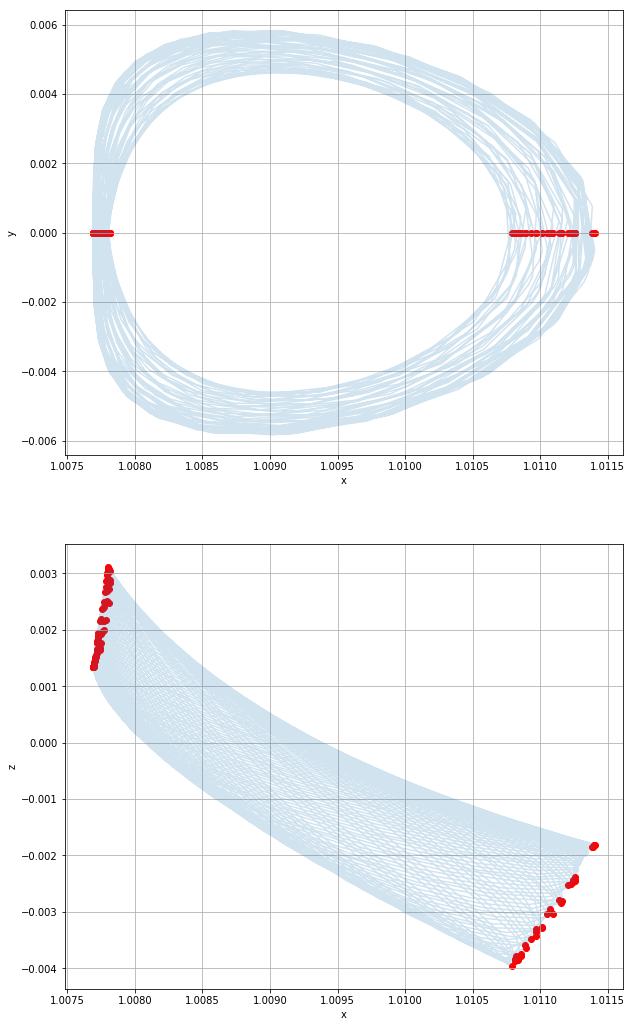

In [93]:
fig1, ax1 = plt.subplots(nrows=2, ncols=1, figsize=(10,18))
ax1[0].grid()
ax1[1].grid()
fig1 = ax1[0].plot('x', 'y', data=df, alpha=0.2)
fig1 = ax1[1].plot('x', 'z', data=df, alpha=0.2)
fig1 = ax1[0].scatter(ninety_nine_points.x, np.zeros(100), color='r')
fig1 = ax1[1].scatter(ninety_nine_points.x, ninety_nine_points.z, color='r')
ax1[0].set_xlabel('x')
ax1[1].set_xlabel('x')
ax1[0].set_ylabel('y')
ax1[1].set_ylabel('z')

In [102]:
df['abs_vy'] = df.v_y.apply(abs)

In [103]:
view = df.sort_values(by=['abs_vy']).reset_index()

In [105]:
for_y = view.loc[:99, ['x', 'y']]

In [109]:
apy = for_y[for_y.y>0].y.min() - for_y[for_y.y<0].y.max()

In [110]:
print('apy = %f km'%(apy*dct_for_useful_shit['R']))

apy = 1380462.608448 km


/srv/jupyterhub/py2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  This is separate from the ipykernel package so we can avoid doing imports until


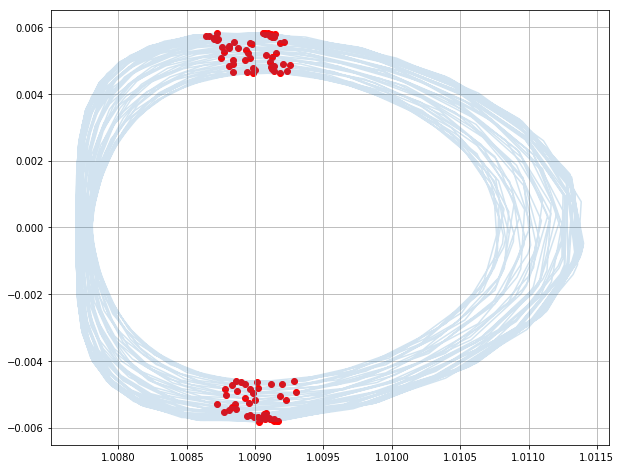

In [108]:
fig2, ax2 = plt.subplots(figsize=(10, 8))
ax2.grid()
fig2 = ax2.plot('x', 'y', data=df, alpha=0.2)
fig2 = ax2.scatter(for_y.x, for_y.y, color='r')